Daily Challenge: Exploring the World Happiness Report with Matplotlib


What you will learn
use Matplotlib alongside pandas to analyze
visualize data from the World Happiness Report
focus on aspects like happiness scores, economic factors, and regional differences.


What you will create
craft a series of data visualizations using the World Happiness Report dataset
uncover insights about global happiness trends and influencing factors.


Instructions
Your objective is to delve into the World Happiness Report dataset, which includes columns like ‘Country’, ‘Year’, ‘Happiness_Score’, ‘GDP_per_Capita’, ‘Social_Support’, ‘Healthy_Life_Expectancy’, ‘Freedom_to_Make_Life_Choices’, ‘Generosity’, and ‘Perceptions_of_Corruption’.

Load and Inspect Data:
Utilize pandas to load the World Happiness Report Dataset.
Examine the data to grasp its structure and contents of the year 2019.

Data Preprocessing:

Address missing values and adjust data types as necessary.

Social Support and Happiness:

Employ a Matplotlib scatter plot to investigate the relationship between ‘Social support’ and ‘Score’.

Regional Comparisons of GDP and Health:
Create a Matplotlib subplot that compares ‘GDP per Capita’ and ‘Healthy Life Expectancy’ across different regions.
Use a bar plot for ‘GDP per Capita’ and a line plot for ‘Healthy Life Expectancy’ on the same axes to observe how economic strength relates to health outcomes in different regions.


In [13]:

import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv('/Users/teitelbaumsair/Desktop/DI_Bootcamp/W5/D1/DAILY CHALLENGE/2019.csv')
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [39]:
#rename columns
df = df.rename(columns={'Overall rank ':'Overall_Rank',
                   'Country or region':'Country_or_Region',
                   'Score':'Happiness_Score',
                   'GDP per capita':'GDP_Per_Capita',
                   'Social support':'Social_Support',
                   'Healthy life expectancy':'Healthy_Life_Expectancy',
                   'Freedom to make life choices':'Freedom_of_Choice',
                   'Generosity':'Generosity',
                   'Perceptions of corruption ':'Perception_of_Corruption'
                    })

In [40]:
df.dtypes


Overall rank                            int64
Country_or_Region                      object
Happiness_Score                       float64
GDP_Per_Capita                        float64
Social_Support                        float64
Healthy_Life_Expectancy               float64
Freedom_of_Choice                     float64
Generosity                            float64
Perceptions of corruption             float64
Social_Support_Normalized             float64
GDP_Per_Capita_Normalized             float64
Healthy_Life_Expectancy_Normalized    float64
dtype: object

In [41]:
df.isna().sum()

Overall rank                          0
Country_or_Region                     0
Happiness_Score                       0
GDP_Per_Capita                        0
Social_Support                        0
Healthy_Life_Expectancy               0
Freedom_of_Choice                     0
Generosity                            0
Perceptions of corruption             0
Social_Support_Normalized             0
GDP_Per_Capita_Normalized             0
Healthy_Life_Expectancy_Normalized    0
dtype: int64

In [42]:
df.duplicated().sum()

np.int64(0)

In [43]:
df.head(10)

,Overall rank,Country_or_Region,Happiness_Score,GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy,Freedom_of_Choice,Generosity,Perceptions of corruption,Social_Support_Normalized,GDP_Per_Capita_Normalized,Healthy_Life_Expectancy_Normalized
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,0.977217,0.795724,86.415425
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,0.968596,0.821259,87.291849
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,0.974138,0.883610,90.096407
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1.000000,0.819477,89.921122
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,0.937192,0.828979,87.554777
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,0.939655,0.862233,92.199825
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,0.915640,0.823634,88.431201
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,0.958744,0.773753,89.921122
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,0.926724,0.810570,91.060473
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,0.908251,0.817102,89.044698


In [71]:
# Normalize Social_Support to be between 1 and 10
min_social_support = df["Social_Support"].min()
max_social_support = df["Social_Support"].max()
df["Social_Support_Normalized"] = 1 + 9 * ((df["Social_Support"] - min_social_support) / (max_social_support - min_social_support))

# Normalize GDP_Per_Capita to be between 1 and 10
min_gdp = df["GDP_Per_Capita"].min()
max_gdp = df["GDP_Per_Capita"].max()
df["GDP_Per_Capita_Normalized"] = 1 + 9 * ((df["GDP_Per_Capita"] - min_gdp) / (max_gdp - min_gdp))


# Normalize Healthy_Life_Expectancy to be between 0 and 100
min_health = df["Healthy_Life_Expectancy"].min()
max_health = df["Healthy_Life_Expectancy"].max()
df["Healthy_Life_Expectancy_Normalized"] = ((df["Healthy_Life_Expectancy"] - min_health) / (max_health - min_health)) * 100

print(df)


     Overall rank         Country_or_Region  Happiness_Score  GDP_Per_Capita  \
0               1                   Finland            7.769           1.340   
1               2                   Denmark            7.600           1.383   
2               3                    Norway            7.554           1.488   
3               4                   Iceland            7.494           1.380   
4               5               Netherlands            7.488           1.396   
..            ...                       ...              ...             ...   
151           152                    Rwanda            3.334           0.359   
152           153                  Tanzania            3.231           0.476   
153           154               Afghanistan            3.203           0.350   
154           155  Central African Republic            3.083           0.026   
155           156               South Sudan            2.853           0.306   

     Social_Support  Healthy_Life_Expec

In [72]:
df.columns

Index(['Overall rank', 'Country_or_Region', 'Happiness_Score',
       'GDP_Per_Capita', 'Social_Support', 'Healthy_Life_Expectancy',
       'Freedom_of_Choice', 'Generosity', 'Perceptions of corruption',
       'Social_Support_Normalized', 'GDP_Per_Capita_Normalized',
       'Healthy_Life_Expectancy_Normalized'],
      dtype='object')

In [73]:
region_to_countries = {
    'Europe': ['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands', 'Switzerland', 'Sweden', 'Austria', 'Luxembourg', 'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'Czech Republic', 'Malta', 'France', 'Italy', 'Slovakia', 'Poland', 'Lithuania', 'Slovenia', 'Kosovo', 'Romania', 'Cyprus', 'Latvia', 'Estonia', 'Spain', 'Portugal', 'Hungary', 'Lithuania', 'Croatia', 'Bosnia and Herzegovina', 'Belarus', 'Greece', 'Montenegro', 'Serbia', 'Moldova', 'Bulgaria', 'Albania', 'Ukraine'],
    'Oceania': ['New Zealand', 'Australia'],
    'North America': ['Canada', 'Costa Rica', 'United States', 'Mexico', 'Guatemala', 'Panama', 'El Salvador', 'Trinidad & Tobago', 'Jamaica', 'Honduras', 'Nicaragua', 'Dominican Republic', 'Haiti'],
    'Middle East': ['Israel', 'United Arab Emirates', 'Saudi Arabia', 'Qatar', 'Bahrain', 'Kuwait', 'Lebanon', 'Jordan', 'Turkey', 'Syria', 'Iraq', 'Palestinian Territories', 'Iran', 'Yemen'],
    'South America': ['Chile', 'Brazil', 'Uruguay', 'Argentina', 'Colombia', 'Peru', 'Ecuador', 'Venezuela', 'Bolivia', 'Paraguay'],
    'Asia': ['Taiwan', 'Singapore', 'Uzbekistan', 'South Korea', 'Thailand', 'Kazakhstan', 'Japan', 'Philippines', 'Pakistan', 'Russia', 'Hong Kong', 'Tajikistan', 'Malaysia', 'Belarus', 'Mongolia', 'North Macedonia', 'Kyrgyzstan', 'Turkmenistan', 'Azerbaijan', 'Indonesia', 'China', 'Vietnam', 'Bhutan', 'Nepal', 'Laos', 'Sri Lanka', 'Myanmar', 'Cambodia', 'Armenia', 'Georgia', 'Bangladesh', 'Iraq', 'Afghanistan', 'India'],
    'Africa': ['Mauritius', 'Libya', 'Nigeria', 'Ghana', 'Ivory Coast', 'Cameroon', 'Gabon', 'South Africa', 'Algeria', 'Morocco', 'Senegal', 'Somalia', 'Namibia', 'Niger', 'Burkina Faso', 'Benin', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Mali', 'Sierra Leone', 'Tunisia', 'Ethiopia', 'Swaziland', 'Uganda', 'Egypt', 'Zambia', 'Togo', 'Liberia', 'Comoros', 'Madagascar', 'Lesotho', 'Burundi', 'Zimbabwe', 'Botswana', 'Guinea', 'Gambia', 'Kenya', 'Mauritania', 'Mozambique', 'Rwanda', 'Tanzania', 'Chad', 'Central African Republic', 'South Sudan'],
}

# Create a function to map country to region
def get_region(country):
    for region, countries in region_to_countries.items():
        if country in countries:
            return region

# Create a new DataFrame by making a copy to avoid modifying a slice
df2 = df[['Overall rank', 'Country_or_Region', 'Happiness_Score', 'Freedom_of_Choice', 
          'Generosity', 'Perceptions of corruption', 'Social_Support_Normalized', 
          'GDP_Per_Capita_Normalized', 'Healthy_Life_Expectancy_Normalized']].copy()

# Create the new column 'Region' based on 'Country_or_Region'
df2['Region'] = df2['Country_or_Region'].apply(get_region)

# View the updated df2
print(df2)

     Overall rank         Country_or_Region  Happiness_Score  \
0               1                   Finland            7.769   
1               2                   Denmark            7.600   
2               3                    Norway            7.554   
3               4                   Iceland            7.494   
4               5               Netherlands            7.488   
..            ...                       ...              ...   
151           152                    Rwanda            3.334   
152           153                  Tanzania            3.231   
153           154               Afghanistan            3.203   
154           155  Central African Republic            3.083   
155           156               South Sudan            2.853   

     Freedom_of_Choice  Generosity  Perceptions of corruption  \
0                0.596       0.153                      0.393   
1                0.592       0.252                      0.410   
2                0.603       0.271  

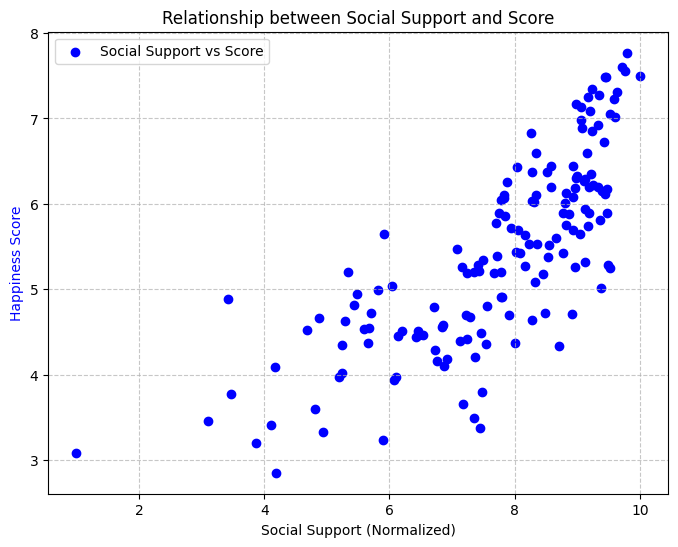

In [74]:
import matplotlib.pyplot as plt

# Define x values and y values
x = df2['Social_Support_Normalized']
y = df2['Happiness_Score']

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the scatter plot
ax.scatter(x, y, color='blue', label='Social Support vs Score')
ax.set_xlabel('Social Support (Normalized)')
ax.set_ylabel('Happiness Score', color='blue')
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_title('Relationship between Social Support and Score')
ax.legend(loc='upper left')
plt.show()

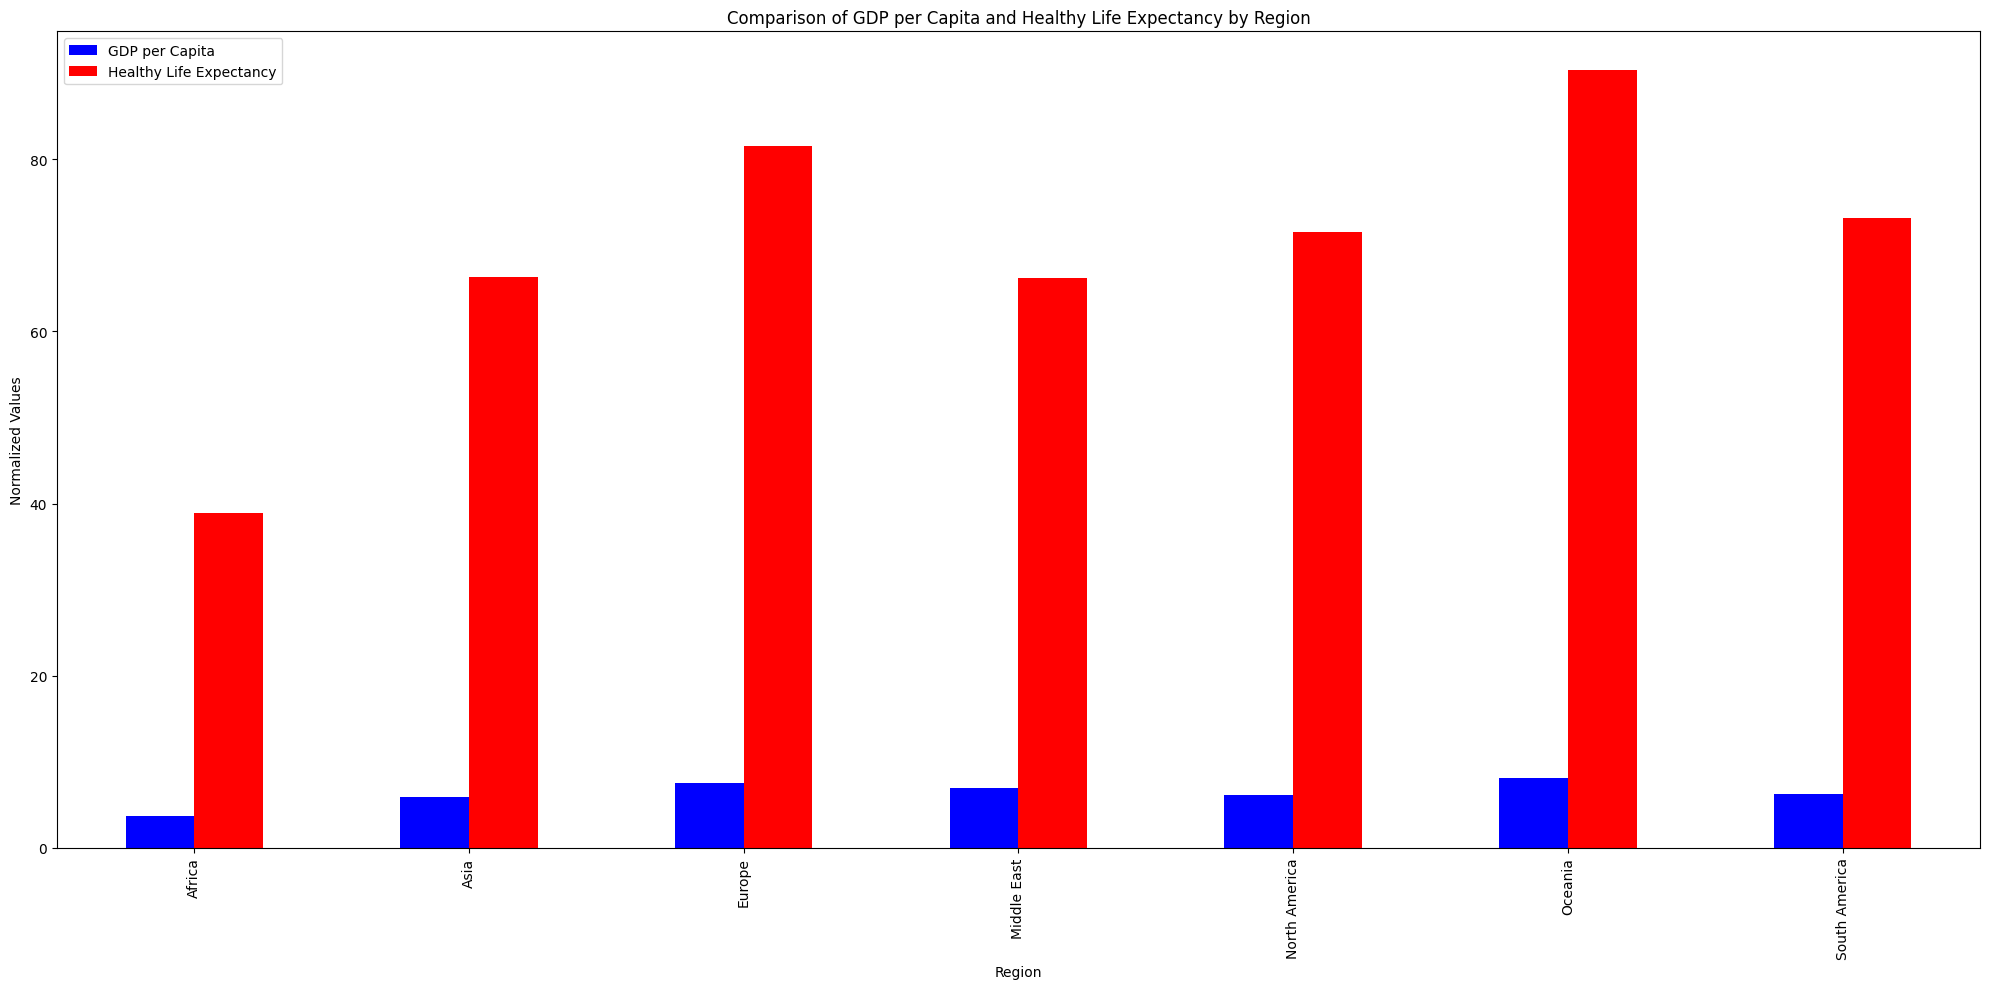

In [82]:
# Create a Matplotlib subplot that compares ‘GDP per Capita’ and ‘Healthy Life Expectancy’ across different regions.
region_data = df2.groupby("Region")[["GDP_Per_Capita_Normalized", "Healthy_Life_Expectancy_Normalized"]].mean()

# Plot the data
fig, ax = plt.subplots(figsize=(20, 10))

# Bar chart for comparison
region_data.plot(kind="bar", ax=ax, color=["blue", "red"])

# Add labels and title
ax.set_title("Comparison of GDP per Capita and Healthy Life Expectancy by Region")
ax.set_xlabel("Region")
ax.set_ylabel("Normalized Values")
ax.legend(["GDP per Capita", "Healthy Life Expectancy"], loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()

Use a bar plot for ‘GDP per Capita’ and a line plot for ‘Healthy Life Expectancy’ on the same axes to observe how economic strength relates to health outcomes in different regions.

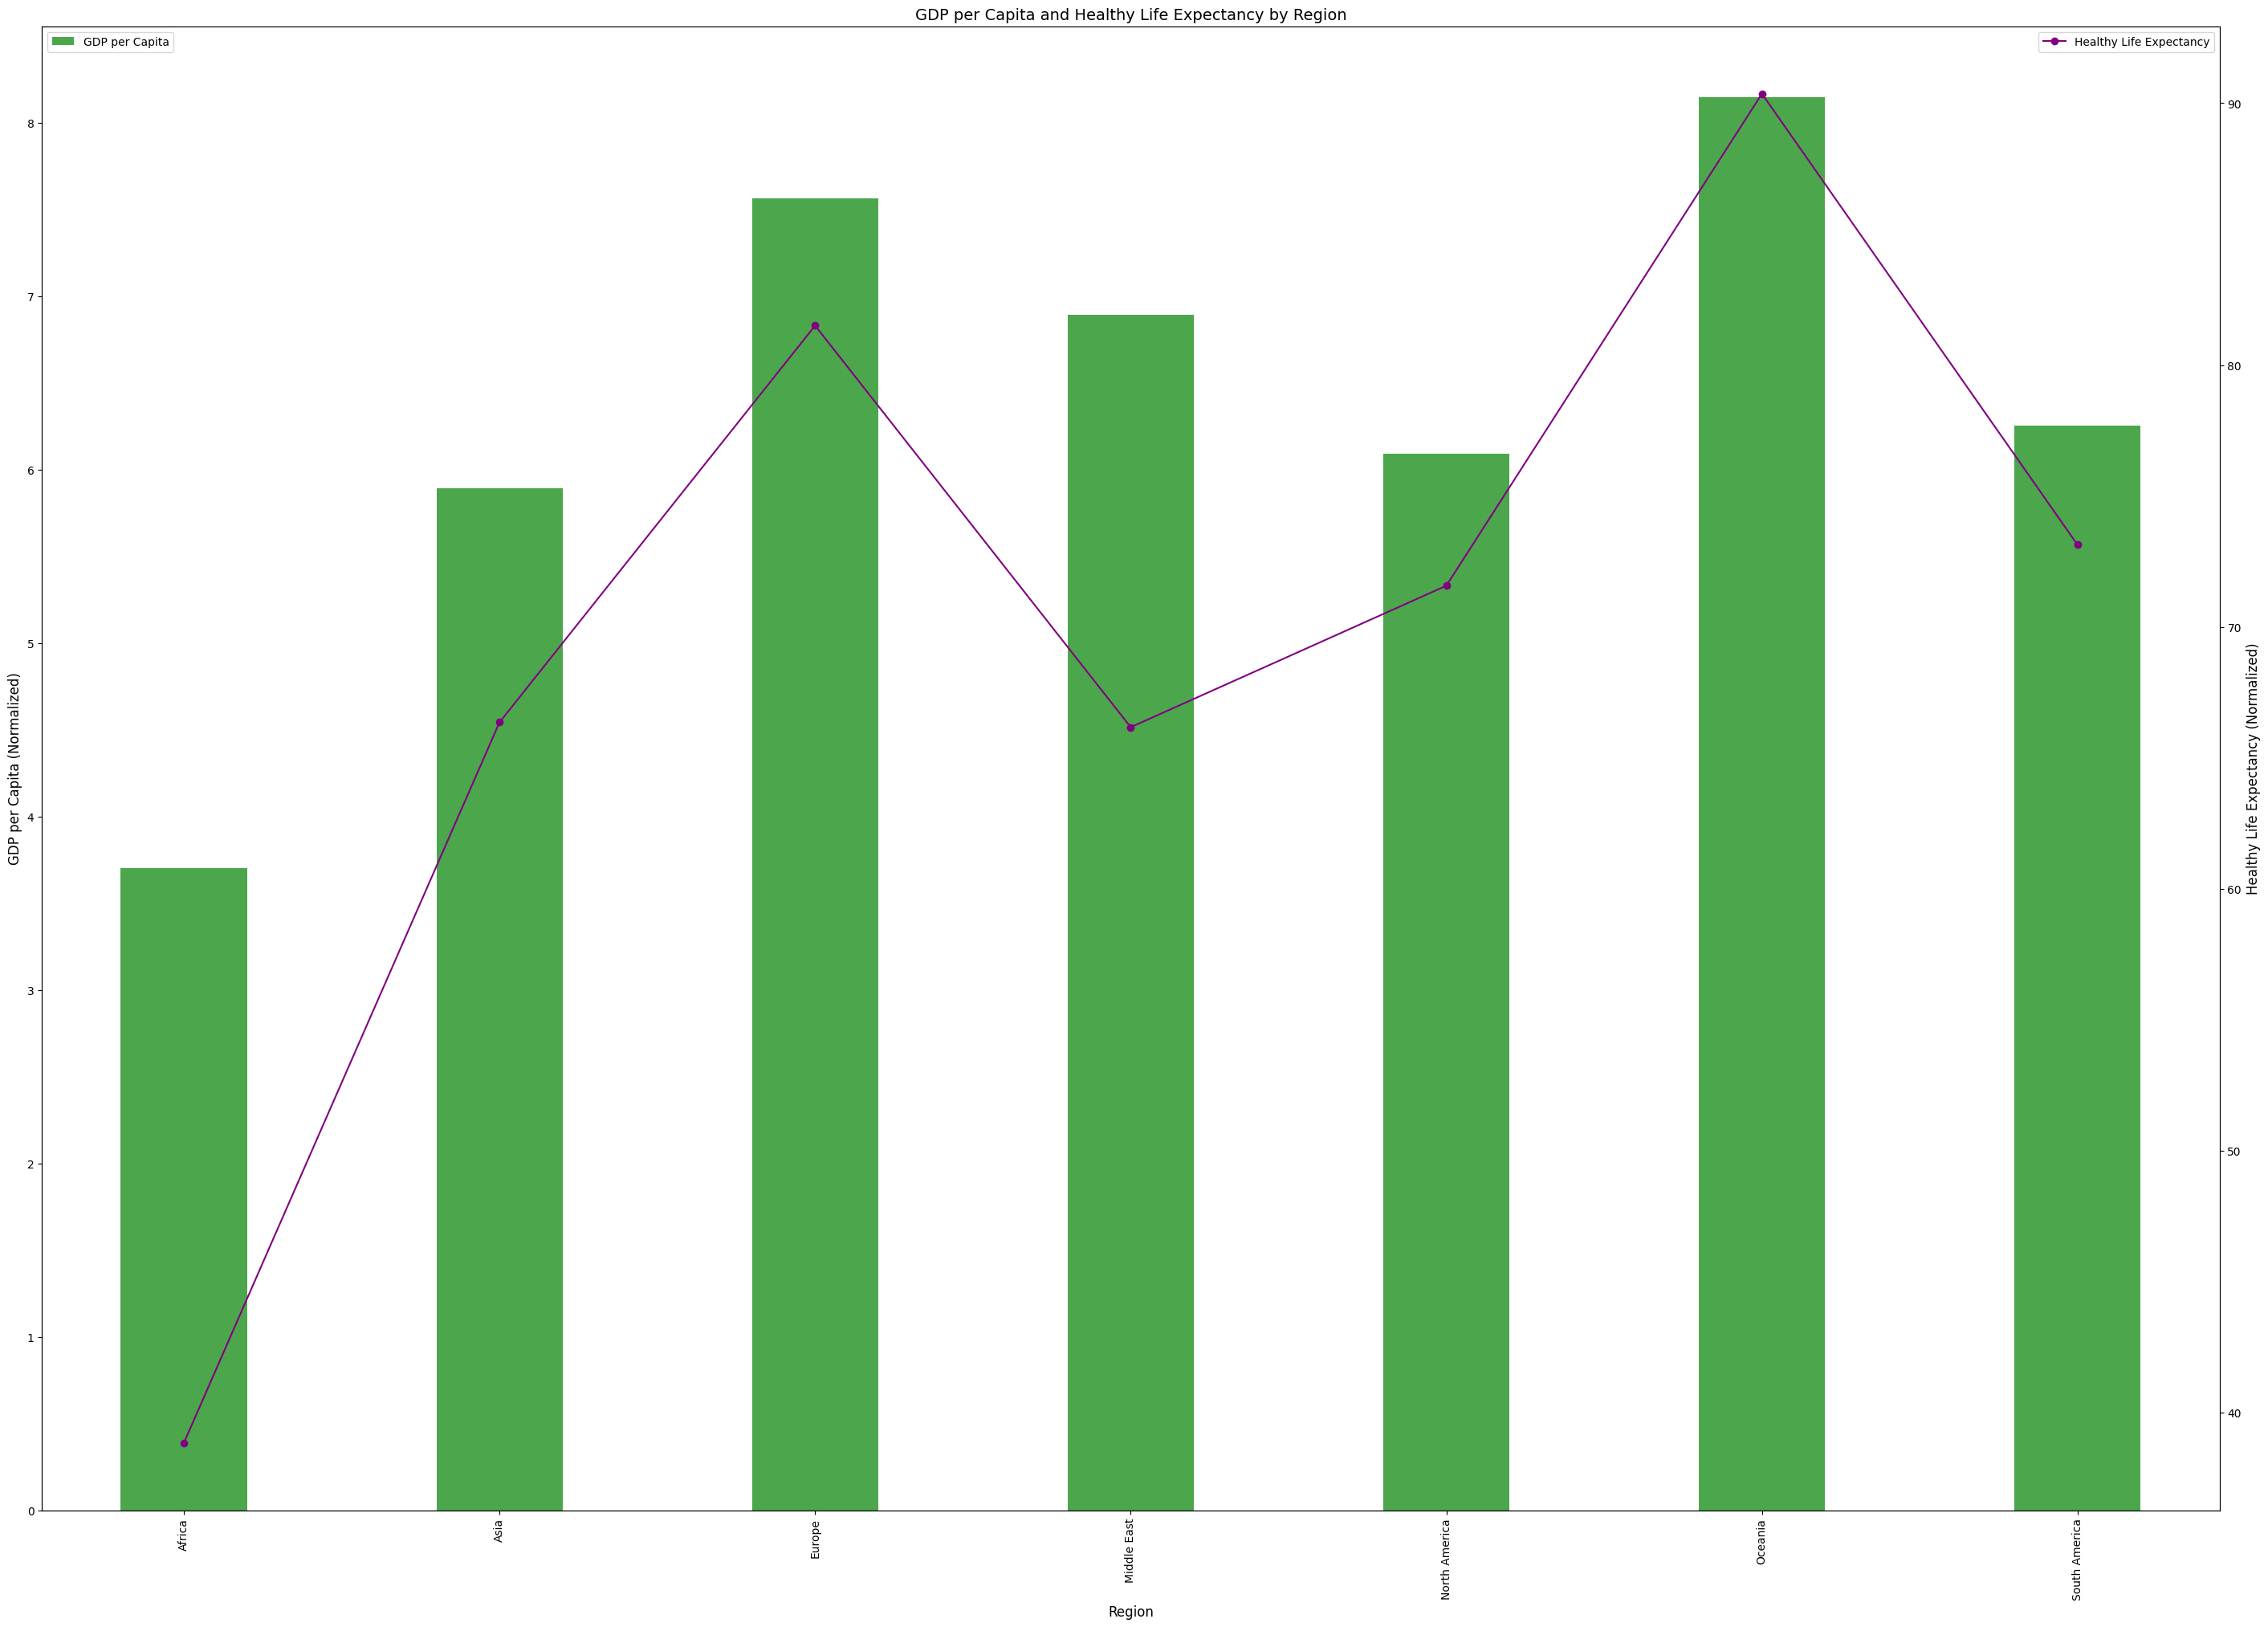

In [81]:
region_data = df2.groupby("Region")[["GDP_Per_Capita_Normalized", "Healthy_Life_Expectancy_Normalized"]].mean()

fig, ax = plt.subplots(figsize=(35, 24))

region_data["GDP_Per_Capita_Normalized"].plot(kind="bar", ax=ax, color="green", alpha=0.7, width=0.4, label="GDP per Capita")

# Create a secondary y-axis for the line plot
ax2 = ax.twinx()
region_data["Healthy_Life_Expectancy_Normalized"].plot(kind="line", ax=ax2, color="purple", marker="o", label="Healthy Life Expectancy")

# Add labels, titles, and legends
ax.set_title("GDP per Capita and Healthy Life Expectancy by Region", fontsize=14)
ax.set_xlabel("Region", fontsize=12)
ax.set_ylabel("GDP per Capita (Normalized)", fontsize=12)
ax2.set_ylabel("Healthy Life Expectancy (Normalized)", fontsize=12)

# Show legends for both axes
ax.legend(loc="upper left")
ax2.legend(loc="upper right")


plt.show()